**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('/content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
# modelo = DecisionTreeClassifier(criterion='entropy')

modelo_controlado = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,              # Limita a profundidade a 5 níveis
    min_samples_leaf=5,       # Cada folha deve ter no mínimo 5 pessoas
    random_state=42           # Garante que o resultado seja o mesmo toda vez
)

# Continue o treinamento com o novo modelo
modelo_controlado.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None




> **Vamos testar o modelo?**



In [ ]:
previsoes = modelo_controlado.predict(X_teste)

In [ ]:
previsoes

array(['nao morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu',
       'nao morreu', 'nao morreu', 'morreu', 'morreu', 'nao morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu',
       'morreu', 'nao morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'nao morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'nao morreu', 'morreu', 'nao morreu',
       'morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu',
       'morreu', 'nao morreu', 'morreu', 'nao morreu', 'morreu',
       'nao morreu', 'nao morreu', 'nao morreu', 'morreu', 'nao morreu',
       'nao morreu', 'morreu', 'morreu', 'nao morreu', 'morreu', 'morreu',
       'morreu', 'nao morreu', 'nao morreu', 'nao morreu', 'morreu',
       'nao morreu', 'morreu', 'morreu', 'morreu', 'nao morreu',
       'na



> **Será se o modelo acertou?**



In [ ]:
y_teste

,Survived
709,nao morreu
439,morreu
840,morreu
720,nao morreu
39,nao morreu
...,...
433,morreu
773,morreu
25,nao morreu
84,nao morreu


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8379888268156425

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[95, 10],
       [19, 55]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8379888268156425

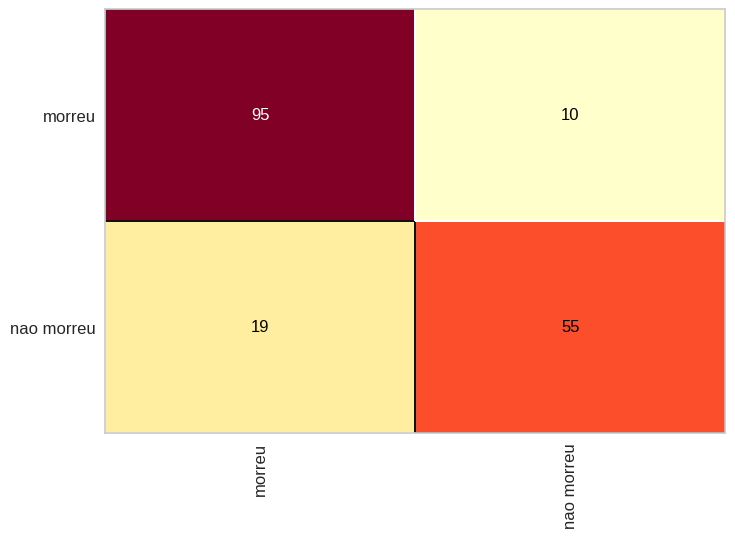

In [ ]:
cm = ConfusionMatrix(modelo_controlado)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

      morreu       0.83      0.90      0.87       105
  nao morreu       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



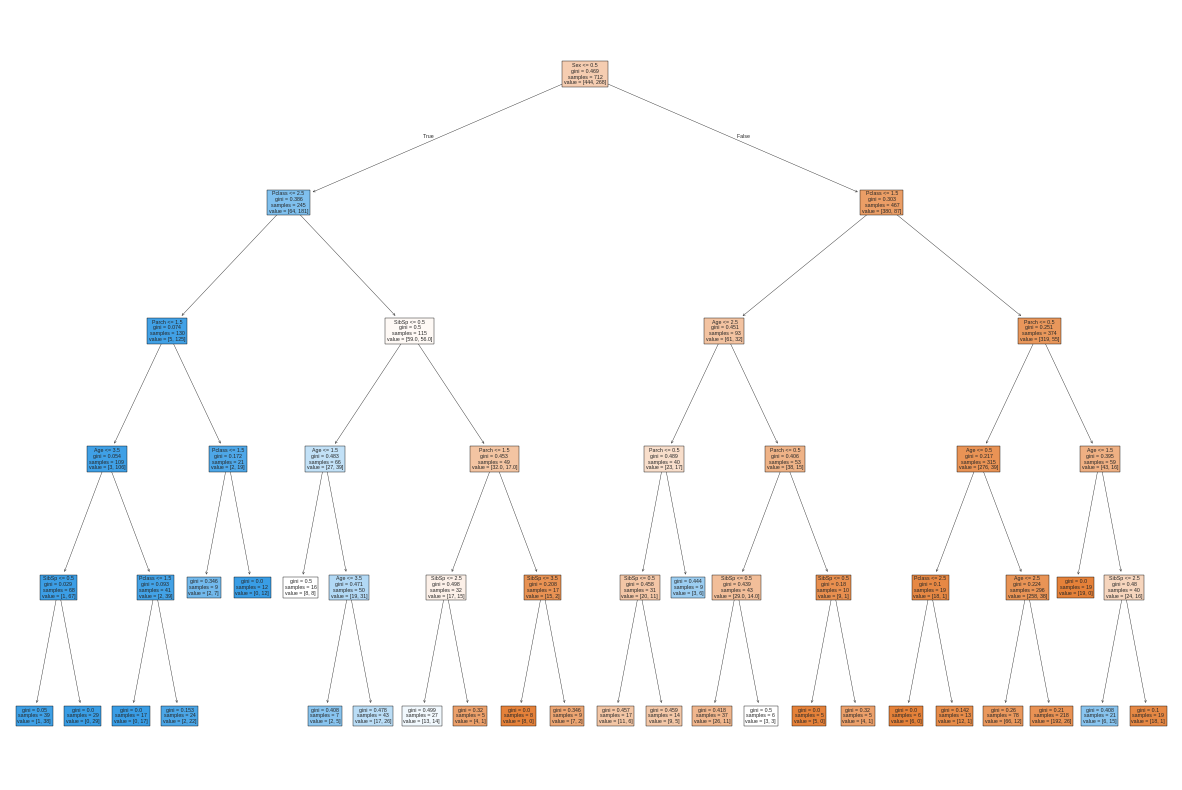

In [ ]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

tree.plot_tree(
    modelo_controlado,
    feature_names=previsores,
    filled=True
);